In [12]:
import pandas as pd

df_train = pd.read_csv('/content/ulasan sentimen.csv')
print(df_train.head())

                                       Ulasan_Bersih Labeling
0                                       sangat bagus  Positif
1  admin bulan berapa tibatiba banget setiap uang...  Negatif
2                       membantu aplikasi susah buka  Negatif
3          banking paling busuk verivikasi berhasil2  Negatif
4  aplikasi jelek sekalimau verifikasi gagal teru...  Negatif


In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('indonesian'))

# Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df_train['processed_text'] = df_train['Ulasan_Bersih'].apply(preprocess_text)
print(df_train[['Ulasan_Bersih', 'processed_text']].head())

# ITFIDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['processed_text'])

                                       Ulasan_Bersih  \
0                                       sangat bagus   
1  admin bulan berapa tibatiba banget setiap uang...   
2                       membantu aplikasi susah buka   
3          banking paling busuk verivikasi berhasil2   
4  aplikasi jelek sekalimau verifikasi gagal teru...   

                                      processed_text  
0                                              bagus  
1  admin tibatiba banget uang masuk potong sampe ...  
2                       membantu aplikasi susah buka  
3                 banking busuk verivikasi berhasil2  
4  aplikasi jelek sekalimau verifikasi gagal samp...  


In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(df_train['Labeling'])

print("Original 'Labeling' values and their encoded numerical representation:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label}: {i}")

print("\nValue counts for encoded y_train:")
import pandas as pd
print(pd.Series(y_train).value_counts())

Original 'Labeling' values and their encoded numerical representation:
Negatif: 0
Netral: 1
Positif: 2

Value counts for encoded y_train:
0    99
2    98
1    47
Name: count, dtype: int64


In [15]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_tfidf, y_train)

print("Logistic Regression model successfully trained.")

Logistic Regression model successfully trained.


In [16]:
import pandas as pd

df_test = pd.read_csv('/content/ulasan uji.csv')

print('First 5 rows of df_test:')
print(df_test.head())

First 5 rows of df_test:
                                          Ulasan Uji
0                                              bagus
1  hallo kenapa sekarang aktif mbanking sulit har...
2                                gangu cepat perbiki
3  baru buka rekening disini udah berhasil setela...
4                            dipakai sama mamah ayah


In [17]:
df_test['processed_text'] = df_test['Ulasan Uji'].apply(preprocess_text)

print("First 5 rows of df_test with processed_text:")
print(df_test[['Ulasan Uji', 'processed_text']].head())

X_test_tfidf = tfidf_vectorizer.transform(df_test['processed_text'])

print(f"\nShape of X_test_tfidf: {X_test_tfidf.shape}")
print(f"Number of features (unique words): {len(tfidf_vectorizer.get_feature_names_out())}")

First 5 rows of df_test with processed_text:
                                          Ulasan Uji  \
0                                              bagus   
1  hallo kenapa sekarang aktif mbanking sulit har...   
2                                gangu cepat perbiki   
3  baru buka rekening disini udah berhasil setela...   
4                            dipakai sama mamah ayah   

                                      processed_text  
0                                              bagus  
1  hallo aktif mbanking sulit pakai verifikasi wa...  
2                                gangu cepat perbiki  
3  buka rekening udah berhasil bank aplikasi apli...  
4                                 dipakai mamah ayah  

Shape of X_test_tfidf: (734, 526)
Number of features (unique words): 526


In [18]:
y_pred_numerical = model_lr.predict(X_test_tfidf)

print("First 5 numerical predictions:")
print(y_pred_numerical[:5])

First 5 numerical predictions:
[2 0 2 0 0]


In [19]:
y_pred_labels = label_encoder.inverse_transform(y_pred_numerical)

print("First 5 predicted sentiment labels:")
print(y_pred_labels[:5])

predictions_df = pd.DataFrame({'Ulasan Uji': df_test['Ulasan Uji'], 'Predicted_Sentiment': y_pred_labels})

predictions_df.to_csv('hasil uji.csv', index=False)

print("\nPredicted sentiments saved to 'hasil uji.csv'")
print("First 5 rows of the saved predictions:")
print(predictions_df.head())

First 5 predicted sentiment labels:
['Positif' 'Negatif' 'Positif' 'Negatif' 'Negatif']

Predicted sentiments saved to 'hasil uji.csv'
First 5 rows of the saved predictions:
                                          Ulasan Uji Predicted_Sentiment
0                                              bagus             Positif
1  hallo kenapa sekarang aktif mbanking sulit har...             Negatif
2                                gangu cepat perbiki             Positif
3  baru buka rekening disini udah berhasil setela...             Negatif
4                            dipakai sama mamah ayah             Negatif


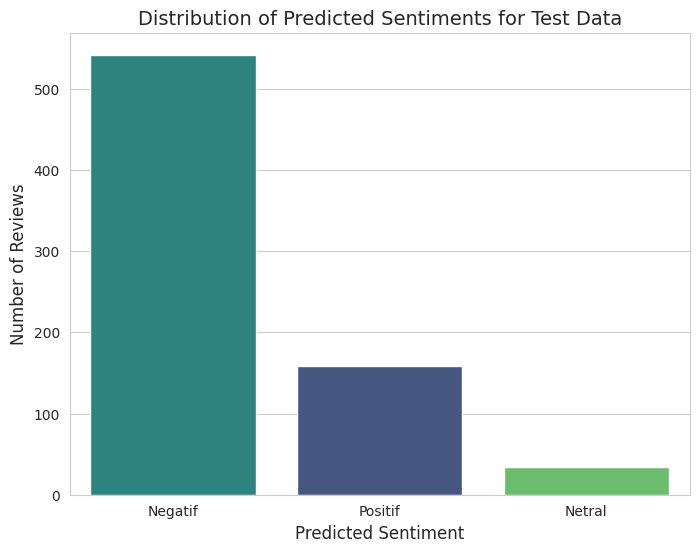

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='Predicted_Sentiment', data=predictions_df, palette='viridis', order=predictions_df['Predicted_Sentiment'].value_counts().index, hue='Predicted_Sentiment', legend=False)

plt.xlabel('Predicted Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title('Distribution of Predicted Sentiments for Test Data', fontsize=14)
plt.show()